In [41]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import CubicSpline

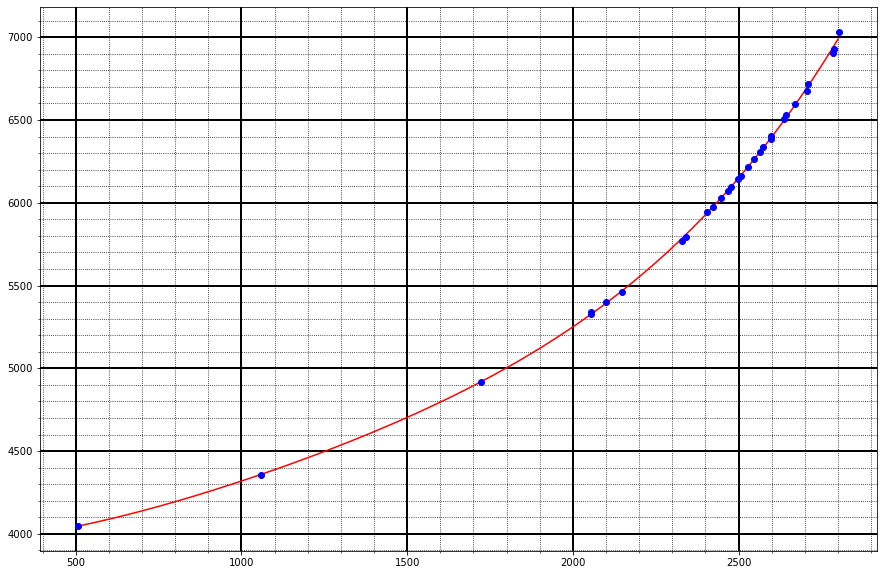

In [90]:
lambd = np.array([7032, 6929, 6717, 6678, 6599, 6533, 6507, 6402, 6383, 6334, 6305, 6267, 6217, 6164, 6143,
                 6096, 6074, 6030, 5976, 5945, 5882, 5852, 5401, 5341, 5331, 6907, 6234, 5791, 5770, 
                  5461, 4916, 4358, 4047], dtype = 'float')
x = np.array([2802, 2788, 2710, 2706, 2670, 2644, 2638, 2599, 2598, 2574, 2566, 2546, 2528, 2506, 2498,
             2476, 2468, 2448, 2424, 2406, 2478, 2463, 2100, 2056, 2054, 2786, 2448, 2342, 2330, 2148, 1724,
             1058, 506], dtype = 'float')
lambd_cut = np.delete(lambd, [26, 20, 21])
x_cut = np.delete(x, [26, 20, 21])
x_new = np.sort(x_cut)

lambd_new = np.sort(lambd_cut)
cs = CubicSpline(x_new, lambd_new)
x_lol = np.linspace(510, 2800, 1000)
p = np.polyfit(x_new, lambd_new, 4)
f = np.poly1d(p)
plt.plot(x_lol, f(x_lol), "r")

plt.plot(x_new, lambd_new, "bo")

fig = plt.gcf()
fig.set_size_inches(15, 10)
ax = plt.gca()
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

plt.show()

In [96]:
Ha = f(2668)
Hb = f(1672)
Hg = f(1031)
Hd = f(622)
print("Ha : ", Ha)
print("Hb : ", Hb)
print("Hg : ", Hg)
print("Hd : ", Hd)

R3 = 10 ** 8 / (Ha * (.25 - 1 / 9))
print(R3)
R4 = 10 ** 8 / (Hb * (.25 - 1 / 16))
print(R4)
R5 = 10 ** 8 / (Hg * (.25 - 1 / 25))
print(R5)

Ha :  6583.409782234912
Hb :  4866.430693723533
Hg :  4339.946573052901
Hd :  4099.099676638657
109365.81859796931
109594.35506216058
109722.65860303064


In [93]:
print(lambd[11], x[11])
print(np.where(lambd == 6234), x[26])
print(np.where(lambd == 5882), x[20])
print(np.where(lambd == 5852), x[21])
print(z)
print(.25 - 1/9)

6267.0 2546.0
(array([26]),) 2448.0
(array([20]),) 2478.0
(array([21]),) 2463.0
[ 2.46140415e-07 -7.07731902e-04  1.27789945e+00  3.53899812e+03]
0.1388888888888889
